# Random Matrix Transformation

the proposed routing algoritm is based on manipulation of the adjacency matrix. Henece in its life cycle it transforms the given adjacncny matrix several time and based on that it takes decissions. 

## Terminologies
for a given topology let's the corresponding undirected graph is $G(V,E)$ where $V$ and $E$ are the vertex and edge set respectvely. Let $n=|V|$ represents the number of vertices in the graph, hence the size of the $E$ for a non-disconnected graph be in a close interval of $[(n-1) , n(n-1)/2]$ 

### adjacnecy Matrices 
* $Adj_b$ is the binary adjacency matrix given by the topology, $Adj_b[i][j] \in  \{0,1\}$ <br>
>  if $ v_i , v_j \in V $ are adjacent $ \rightarrow $ 1 else 0
* $Adj_e$ is the random adjacency matrix where edges are randomly weighted representing the change in link utilization <br>
> $ Adj_e = Rand \cdot Adj_b$
* $Adj_n$ is the random matrix where the digonal positions are ramdomly weighted representting rhe change in node utilization <br>
> $Adj_n = (Rand \cdot I) + Adj_e = (Rand \cdot I) + (Rand \cdot Adj_b)$ <br>
* $Affinity$ is a matrix of order $n \times n$ is a random matrix <br>
> i. random weight in position $[1][j]$ such that, $adj_b[i][j] = 1$ <br>
> ii. $\sum Affinity[i] = 1$
* $Adj_s$ is obtained after normalising $adj_n$ using STEN algorithm. 
> $Sdj_s = Affinity \cdot $


### Random Transformation flow chart 
follwing is the flowchart representing the random tranformatrion. <br>
![flowchart](reliable_routing_flow_chart.svg)


# Topology computation 
## sample topology
the following is a sample topology for computing. 
![topology](initial_topo.svg)

## Adjacency Matrix

In [2]:
adj = [[0,1,1,0,0,1],
       [1,0,0,0,0,1],
       [1,0,0,1,1,0],
       [0,0,1,0,1,1],
       [0,0,1,1,0,0],
       [1,1,0,1,0,0]]

In [2]:
import pandas as pd
pd.DataFrame(adj)

,0,1,2,3,4,5
0,0,1,1,0,0,1
1,1,0,0,0,0,1
2,1,0,0,1,1,0
3,0,0,1,0,1,1
4,0,0,1,1,0,0
5,1,1,0,1,0,0


node_1 , node_2 : Added
node_1 , node_3 : Added
node_1 , node_6 : Added
node_2 , node_1 : Added
node_2 , node_6 : Added
node_3 , node_1 : Added
node_3 , node_4 : Added
node_3 , node_5 : Added
node_4 , node_3 : Added
node_4 , node_5 : Added
node_4 , node_6 : Added
node_5 , node_3 : Added
node_5 , node_4 : Added
node_6 , node_1 : Added
node_6 , node_2 : Added
node_6 , node_4 : Added


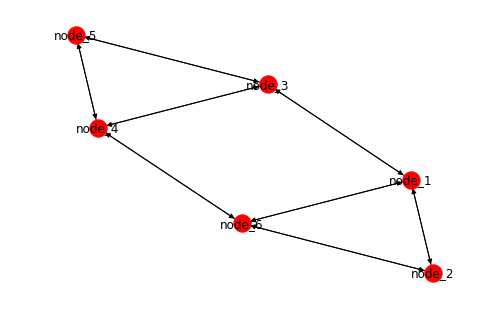

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

topo=nx.MultiDiGraph()

def create_topo(graph, adj_matrix):
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix[i])):
            if adj_matrix[i][j] != 0:
                graph.add_edge('node_'+str(i+1),'node_'+str(j+1))
                print(f'node_{i+1} , node_{j+1} : Added')
    return graph

topo=create_topo(graph=topo, adj_matrix=adj)
nx.draw(topo, pos=nx.spring_layout(topo), with_labels=True)

## Matrix Computation with SciPy

In [4]:
import numpy as np
import scipy as sp

### Creating A numpy matrix from list structure

In [5]:
adj_b=np.matrix(adj)
print(adj_b)

[[0 1 1 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 1 1 0]
 [0 0 1 0 1 1]
 [0 0 1 1 0 0]
 [1 1 0 1 0 0]]


### Creating random matrix

In [6]:
rand = np.random.rand(adj_b.shape[0], adj_b.shape[1])
pd.DataFrame(rand)

,0,1,2,3,4,5
0,0.350362,0.742650,0.769226,0.722617,0.773248,0.918736
1,0.075638,0.578255,0.232440,0.674181,0.374713,0.827053
2,0.340607,0.736113,0.497091,0.827689,0.823577,0.768820
3,0.786678,0.655444,0.673674,0.010984,0.509759,0.212857
4,0.816263,0.651846,0.250385,0.281269,0.388922,0.113623
5,0.601244,0.397514,0.528476,0.013932,0.192428,0.589850


### Element wise multiplicartion $adj_e = rand \cdot adj_b$

In [7]:
adj_e = np.multiply(rand, adj_b)
pd.DataFrame(adj_e)

,0,1,2,3,4,5
0,0.000000,0.742650,0.769226,0.000000,0.000000,0.918736
1,0.075638,0.000000,0.000000,0.000000,0.000000,0.827053
2,0.340607,0.000000,0.000000,0.827689,0.823577,0.000000
3,0.000000,0.000000,0.673674,0.000000,0.509759,0.212857
4,0.000000,0.000000,0.250385,0.281269,0.000000,0.000000
5,0.601244,0.397514,0.000000,0.013932,0.000000,0.000000


### Calulating $Adj_n = (rand \cdot I) + Adj_e$

In [8]:
x=np.multiply(np.random.rand(adj_b.shape[0],adj_b.shape[1]) , np.identity(adj_b.shape[0]))
pd.DataFrame(x)

,0,1,2,3,4,5
0,0.321271,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.095192,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.762525,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.335117,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.273999,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.419551


In [9]:
adj_n = x + adj_e
pd.DataFrame(adj_n)

,0,1,2,3,4,5
0,0.321271,0.742650,0.769226,0.000000,0.000000,0.918736
1,0.075638,0.095192,0.000000,0.000000,0.000000,0.827053
2,0.340607,0.000000,0.762525,0.827689,0.823577,0.000000
3,0.000000,0.000000,0.673674,0.335117,0.509759,0.212857
4,0.000000,0.000000,0.250385,0.281269,0.273999,0.000000
5,0.601244,0.397514,0.000000,0.013932,0.000000,0.419551


g.add_edge('node_1' , 'node_1', weight=0.321)
g.add_edge('node_1' , 'node_2', weight=0.743)
g.add_edge('node_1' , 'node_3', weight=0.769)
g.add_edge('node_1' , 'node_6', weight=0.919)
g.add_edge('node_2' , 'node_1', weight=0.076)
g.add_edge('node_2' , 'node_2', weight=0.095)
g.add_edge('node_2' , 'node_6', weight=0.827)
g.add_edge('node_3' , 'node_1', weight=0.341)
g.add_edge('node_3' , 'node_3', weight=0.763)
g.add_edge('node_3' , 'node_4', weight=0.828)
g.add_edge('node_3' , 'node_5', weight=0.824)
g.add_edge('node_4' , 'node_3', weight=0.674)
g.add_edge('node_4' , 'node_4', weight=0.335)
g.add_edge('node_4' , 'node_5', weight=0.51)
g.add_edge('node_4' , 'node_6', weight=0.213)
g.add_edge('node_5' , 'node_3', weight=0.25)
g.add_edge('node_5' , 'node_4', weight=0.281)
g.add_edge('node_5' , 'node_5', weight=0.274)
g.add_edge('node_6' , 'node_1', weight=0.601)
g.add_edge('node_6' , 'node_2', weight=0.398)
g.add_edge('node_6' , 'node_4', weight=0.014)
g.add_edge('node_6' , 'node_6', weig

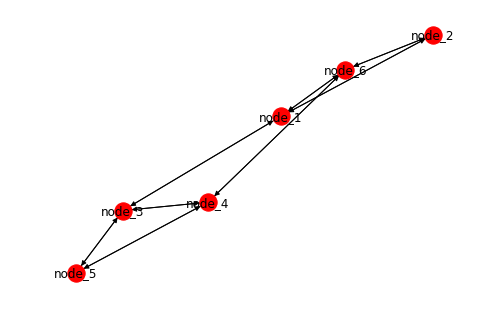

In [22]:
topo_weighted = nx.MultiDiGraph(selfloop=True)

def create_topo_with_weight(g, weighted_matrix):
    for i in range(len(weighted_matrix)):
        for j in range(len(weighted_matrix)):
            if weighted_matrix.item(i,j) != 0:
                
                val = round(weighted_matrix.item(i,j),3)
                g.add_edge('node_'+str(i+1),
                           'node_'+str(j+1),
                           weight=val,
                           lenghth=val)
                
                print(f"g.add_edge('node_{i+1}' , 'node_{j+1}', weight={round(val,3)})")
    return g

topo_weighted = create_topo_with_weight(topo_weighted, adj_n)

nx.draw(topo_weighted, 
        pos=nx.spring_layout(topo_weighted), 
        with_labels=True)


### Generating Affinity Matrix

In [11]:
# this fucntion takes a adj-b and return row-wise indexes of non-zero numbers

def get_non_zero_index(adj):
    ret=[]
    for i in range(adj.shape[0]):
        row=[]
        for j in range(adj.shape[1]):
            if adj.item(i,j)!=0:
                row.append(j)
        ret.append(row)
    return np.matrix(ret)

nz_indx_mat = get_non_zero_index(adj_b)
pd.DataFrame(nz_indx_mat)

,0,1,2,3,4,5
0,"[1, 2, 5]","[0, 5]","[0, 3, 4]","[2, 4, 5]","[2, 3]","[0, 1, 3]"


In [12]:
# this fucntion distributes a random number in [0,1] range
'''
for each row, let there are n non zero elements 
    generate n random number between [0,100]
    ith elemt of the row is i / sum(n numbers)
    {i1 / (r1 + .. + rn)} + ... + {in /(r1 + ... + rn )} = 1 
'''
import random

def distribute_rand_over_nz_row(mat):
    ret = []
    for row in range(mat.shape[1]):
        temp=[]
        for i in range(len(mat.item(row))):
            temp.append(random.randint(0,100))
        r_sum=sum(temp)
        for i in range(len(temp)):
            temp[i] = round((temp[i] / r_sum), 3)
        ret.append(temp)
    return ret

nz_rand_mat = distribute_rand_over_nz_row( get_non_zero_index(adj_b))
pd.DataFrame(nz_rand_mat)            

,0,1,2
0,0.203,0.437,0.360
1,0.320,0.680,NaN
2,0.209,0.238,0.552
3,0.396,0.213,0.390
4,0.308,0.692,NaN
5,0.250,0.169,0.581


In [13]:
def generate_affinity(nz_indx_mat , nz_rand_mat, adj_n):
    ret=[]
    for i in range(adj_n.shape[0]): 
        n_util = adj_n.item(i,i)
        row=[]
        k=0
        for j in range(adj_n.shape[1]):
            if j in nz_indx_mat.item(i):
                offset = nz_rand_mat[i][k] * n_util
                row.append(offset)
                k+=1
            else:
                row.append(0)
        row[i]=-n_util
        ret.append(row)
    return ret

affifity_mat=generate_affinity(nz_indx_mat, nz_rand_mat, adj_n)
pd.DataFrame(affifity_mat)

,0,1,2,3,4,5
0,-0.321271,0.065218,0.140395,0.000000,0.000000,0.115657
1,0.030461,-0.095192,0.000000,0.000000,0.000000,0.064731
2,0.159368,0.000000,-0.762525,0.181481,0.420914,0.000000
3,0.000000,0.000000,0.132706,-0.335117,0.071380,0.130696
4,0.000000,0.000000,0.084392,0.189607,-0.273999,0.000000
5,0.104888,0.070904,0.000000,0.243759,0.000000,-0.419551


### STEN (Stochastic Temporal Edge Normalization)
$Adj_s = Affinity + Adj_n$

In [14]:
adj_s = affifity_mat + adj_n
pd.DataFrame(adj_s)

,0,1,2,3,4,5
0,0.000000,0.807868,0.909621,0.000000,0.000000,1.034393
1,0.106099,0.000000,0.000000,0.000000,0.000000,0.891784
2,0.499975,0.000000,0.000000,1.009170,1.244491,0.000000
3,0.000000,0.000000,0.806380,0.000000,0.581139,0.343552
4,0.000000,0.000000,0.334776,0.470876,0.000000,0.000000
5,0.706132,0.468418,0.000000,0.257691,0.000000,0.000000


g.add_edge('node_1' , 'node_2', weight=0.808)
g.add_edge('node_1' , 'node_3', weight=0.91)
g.add_edge('node_1' , 'node_6', weight=1.034)
g.add_edge('node_2' , 'node_1', weight=0.106)
g.add_edge('node_2' , 'node_6', weight=0.892)
g.add_edge('node_3' , 'node_1', weight=0.5)
g.add_edge('node_3' , 'node_4', weight=1.009)
g.add_edge('node_3' , 'node_5', weight=1.244)
g.add_edge('node_4' , 'node_3', weight=0.806)
g.add_edge('node_4' , 'node_5', weight=0.581)
g.add_edge('node_4' , 'node_6', weight=0.344)
g.add_edge('node_5' , 'node_3', weight=0.335)
g.add_edge('node_5' , 'node_4', weight=0.471)
g.add_edge('node_6' , 'node_1', weight=0.706)
g.add_edge('node_6' , 'node_2', weight=0.468)
g.add_edge('node_6' , 'node_4', weight=0.258)


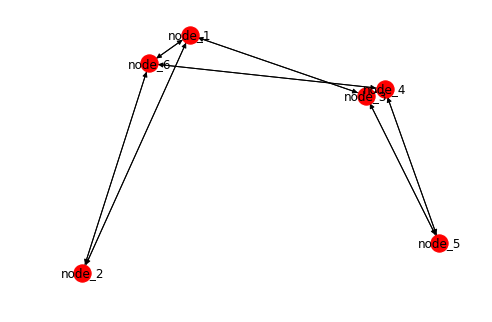

In [15]:
topo_s = nx.MultiDiGraph()
topo_s = create_topo_with_weight(topo_s, adj_s)
nx.draw(topo_s, pos=nx.spectral_layout(topo_s), with_labels=True)

## Shortest Path Algorithm : Dijkstra's Algo

In [16]:
def show_shortest_path(graph, src, dst):
    path = nx.shortest_path(G=graph, source=src, target=dst)
    route = nx.Graph()
    for i in range(len(path) -1):
        route.add_edge(path[i],path[i+1])
    
    return nx.draw(route,pos=nx.spring_layout(route), with_labels=True)

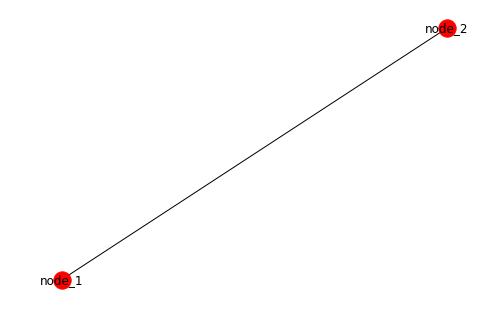

In [17]:
show_shortest_path(topo_s,'node_1','node_2')

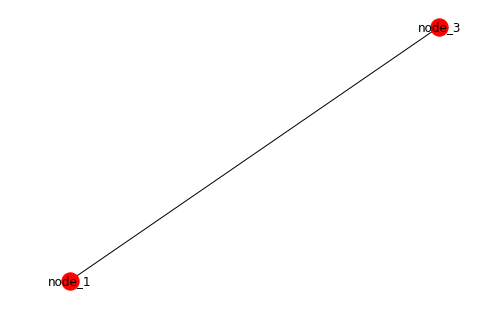

In [18]:
show_shortest_path(topo_s,'node_1','node_3')

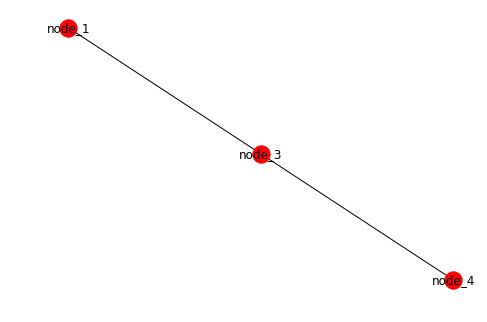

In [19]:
show_shortest_path(topo_s,'node_1','node_4')

# Temporal Reliability 

## Terminologies

* $buffer_t$ is the temporal bounded buffer of a constant size $k$ <br>
> this stores varying weights of edges after __STEN__ normalization sampled by time <br>
* __quality__ function $Q(.)=w_\mu \mu + w_\sigma \sigma$ is the quality function over $buffer_t$ <br>
> $\mu$ is the Median and <br>
> $\sigma$ is the standard deviation <br>
* __Reliability__ function $R(.)=Z(Q(.))$ gives the ranking factors and must be normalised, hence $R(.)\in[0,1]$ <br>
> $Z(.)$ is the Z-trasforation over $Q(.)$ to scale

## Generating a random sample space of given nodes and buffer size

In [20]:
def generate_random_samples(node_count, buffer_size):
    ret=[]
    for node_history in range(node_count):
        col=[]
        for sample in range(buffer_size):
            x=np.random.randn()#0,100)/100
            y=np.random.randn()#0,100)/100
            z=np.random.randn()#0,100)/100
            # for more randomness (x+y)*z
            col.append(((x+y)*z)**2)
        ret.append(col)
    return ret

rand_sample=generate_random_samples(len(topo_s.nodes), 150)
pd.DataFrame(rand_sample)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.200159,0.324982,0.004925,0.711542,0.003051,19.748507,0.144722,3.567514,1.707426,0.047932,...,0.014015,7.439730,1.374820,7.734268,0.000012,19.077057,0.119882,0.490593,3.807174e-08,0.000134
1,1.144488,0.736520,0.080189,1.286557,1.984345,11.833506,0.074303,0.270642,0.942037,0.000069,...,0.001625,0.027787,0.000418,3.956765,3.947280,2.683963,5.937108,0.000769,3.998849e-01,0.045948
2,0.489994,1.031843,4.105517,2.331315,0.094370,0.000015,0.011822,0.546999,6.238759,5.313471,...,2.733042,3.315922,0.004339,0.001111,10.546094,0.064470,0.078654,0.464612,3.139942e-03,0.085707
3,9.553671,0.075903,0.665780,0.009735,0.069848,43.416209,0.120351,0.013573,1.219812,7.196966,...,1.443914,0.010108,0.000875,0.334004,0.042301,7.960813,0.000022,0.035194,2.005051e-02,0.034911
4,0.589359,0.065492,0.000084,10.693560,1.056593,0.033923,0.066046,0.015297,2.774452,0.063352,...,0.000001,0.737906,0.322680,0.000249,0.064930,0.022944,7.836428,7.503084,3.306698e-02,0.428466
5,0.111047,0.003816,1.875845,0.000439,1.186409,0.066911,0.057823,0.986700,0.458999,0.047992,...,0.207397,25.454606,0.059186,19.733624,0.006706,0.094396,0.025371,0.000814,8.622589e-03,0.737972


In [21]:
def collect_samples(adj_s sample_size):
    adj_samples=[]
    adj_sample_space=[]
    edge_index
    
    for i in adj_s.shape()[0]:
        for j in adj_s.shape()[1]:
            
    
    

SyntaxError: invalid syntax (<ipython-input-21-def20062f52d>, line 1)

[0.22693276236140464, 0.319732316463381, 0.24011701895923987, 0.2858707275003839, 0.31803742884563707, 0.2962496792068554]
[5.32622775167135, 11.634288660063895, 4.0363742411533154, 6.562648608516241, 3.421711129596647, 8.572022203292102]


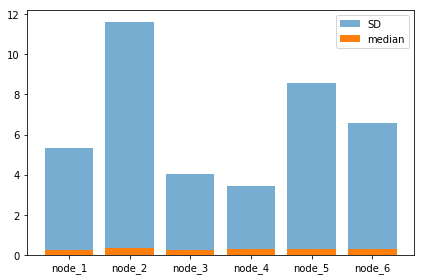

In [23]:
def get_median_sd(sampled_matrix):
    import statistics as stat
    median=[]
    sd=[]
    for node_history in sampled_matrix:
        median.append(stat.median(node_history))
        sd.append(stat.stdev(node_history))
    return(median,sd)

sample_median, sample_sd = get_median_sd(rand_sample)

print(sample_median)
print(sample_sd)

plt.bar(topo_s.nodes,sample_sd, label='SD',alpha=0.6)
plt.bar(topo_s.nodes,sample_median, label='median', alpha=1)
plt.legend()
plt.tight_layout()
plt.show()

### Quality Caculation
$Q(X) = w_\mu\mu(X) + w_\sigma\sigma(X)$

[4.306368753809362, 9.371377391343794, 3.2771227967145005, 5.30729303231307, 2.8009763894464452, 6.916867698475053]


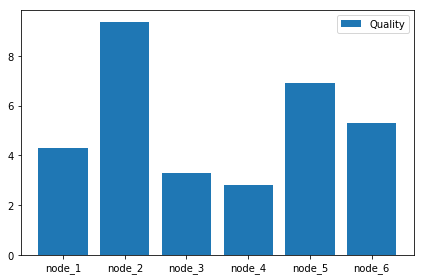

In [24]:
def get_Quality(s_median, s_sd, w1=0.5, w2=0.5):
    q=[]
    for i in range(len(s_median)):
        q.append(w1*s_median[i] + w2*s_sd[i])
    return q

q_vector = get_Quality(sample_median, sample_sd, w1=0.2, w2=0.8)
print(q_vector)

plt.bar(topo_s.nodes,q_vector, label='Quality', alpha=1)
plt.legend()
plt.tight_layout()
plt.show()
        

### Reliability Calculation
$R = Z(Q(X))$

[0.7708827263468088, 0.0, 0.9275316061941186, 0.6185443411836096, 1.0, 0.3735707595563721]


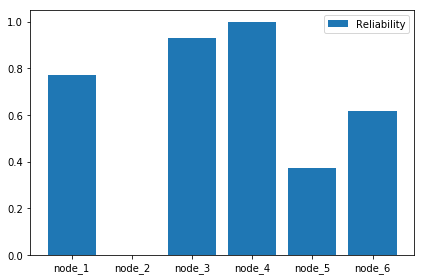

In [26]:
def get_Reliability(quality_vct):
    R=[]
    for q in quality_vct:
        R.append(1- ((q-min(quality_vct))/(max(quality_vct)-min(quality_vct))))
    return R

r_vector = get_Reliability(q_vector)
print(r_vector)

plt.bar(topo_s.nodes,r_vector, label='Reliability', alpha=1)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
import numpy as np
import random
res=[]

for i in range(10):
    r_vect=[]
    for j in range(4):
        r_vect.append(random.randint(0,100))
    res.append(r_vect)
    #print(f'{res} \n-----------------------------')
res = np.transpose(np.matrix(res))
print(res)


[[ 12  51  71  97  21  68  47  80  16  36]
 [100  11  82  50  20  65  55  70  82  27]
 [ 17  47  72  51  67   9  16  32  37  71]
 [ 91  21  56  23  48  75  41  10  32  50]]


In [58]:
x=[]
a=[1,2,3,4]
b=[2,3,4,5]
x.append(a)
x.append(b)
x
np.matrix(x)
np.transpose(x)

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5]])

In [65]:
import random
random.randint(0,100)

56